In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import chi2_contingency

In [ ]:
# Replace 'your_dataset.csv' with the actual filename
file_path = '/content/Crime_Data_from_2020_to_Present_20241018.csv'

try:
  crime_data = pd.read_csv(file_path)
  print("Dataset loaded successfully.")
  # You can now work with the DataFrame 'df'
except FileNotFoundError:
  print(f"Error: File '{file_path}' not found.")
except pd.errors.ParserError:
  print(f"Error: Could not parse the file '{file_path}'. Check the file format.")
except Exception as e:
  print(f"An unexpected error occurred: {e}")


Dataset loaded successfully.


In [ ]:
crime_data.head()

DR_NO               Date Rptd                DATE OCC  TIME OCC  AREA  \
0  190326475  03/01/2020 12:00:00 AM  03/01/2020 12:00:00 AM      2130     7   
1  200106753  02/09/2020 12:00:00 AM  02/08/2020 12:00:00 AM      1800     1   
2  200320258  11/11/2020 12:00:00 AM  11/04/2020 12:00:00 AM      1700     3   
3  200907217  05/10/2023 12:00:00 AM  03/10/2020 12:00:00 AM      2037     9   
4  220614831  08/18/2022 12:00:00 AM  08/17/2020 12:00:00 AM      1200     6   

   AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
0   Wilshire          784         1     510   
1    Central          182         1     330   
2  Southwest          356         1     480   
3   Van Nuys          964         1     343   
4  Hollywood          666         2     354   

                                Crm Cd Desc  ... Status   Status Desc  \
0                          VEHICLE - STOLEN  ...     AA  Adult Arrest   
1                     BURGLARY FROM VEHICLE  ...     IC   Invest Cont   
2                             BIKE - STOLEN  ...     IC   Invest Cont   
3  SHOPLIFTING-GRAND THEFT ($950.01 & OVER)  ...     IC   Invest Cont   
4                         THEFT OF IDENTITY  ...     IC   Invest Cont   

  Crm Cd 1 Crm Cd 2  Crm Cd 3 Crm Cd 4  \
0    510.0    998.0       NaN      NaN   
1    330.0    998.0       NaN      NaN   
2    480.0      NaN       NaN      NaN   
3    343.0      NaN       NaN      NaN   
4    354.0      NaN       NaN      NaN   

                                   LOCATION Cross Street      LAT       LON  
0   1900 S  LONGWOOD                     AV          NaN  34.0375 -118.3506  
1   1000 S  FLOWER                       ST          NaN  34.0444 -118.2628  
2   1400 W  37TH                         ST          NaN  34.0210 -118.3002  
3  14000    RIVERSIDE                    DR          NaN  34.1576 -118.4387  
4                         1900    TRANSIENT          NaN  34.0944 -118.3277  

[5 rows x 28 columns]

In [ ]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986500 entries, 0 to 986499
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           986500 non-null  int64  
 1   Date Rptd       986500 non-null  object 
 2   DATE OCC        986500 non-null  object 
 3   TIME OCC        986500 non-null  int64  
 4   AREA            986500 non-null  int64  
 5   AREA NAME       986500 non-null  object 
 6   Rpt Dist No     986500 non-null  int64  
 7   Part 1-2        986500 non-null  int64  
 8   Crm Cd          986500 non-null  int64  
 9   Crm Cd Desc     986500 non-null  object 
 10  Mocodes         840065 non-null  object 
 11  Vict Age        986500 non-null  int64  
 12  Vict Sex        846925 non-null  object 
 13  Vict Descent    846914 non-null  object 
 14  Premis Cd       986486 non-null  float64
 15  Premis Desc     985915 non-null  object 
 16  Weapon Used Cd  326368 non-null  float64
 17  Weapon Des

In [ ]:
crime_data['DATE OCC'] = pd.to_datetime(crime_data['DATE OCC'])
# Filter data for November 2023
nov_2023_data = crime_data[(crime_data['DATE OCC'] >= '2024-01-01') & (crime_data['DATE OCC'] < '2024-10-18')]

nov_2023_data = nov_2023_data.sort_values(by='DATE OCC')

# Save the filtered data to a new CSV file
nov_2023_data.to_csv('crimedata_2024.csv', index=False)

print("November 2023 data extracted and saved as 'crime_data_nov_2023.csv'.")


<ipython-input-13-0da5cd8b9ba7>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  crime_data['DATE OCC'] = pd.to_datetime(crime_data['DATE OCC'])


November 2023 data extracted and saved as 'crime_data_nov_2023.csv'.


In [ ]:
df = pd.read_csv("/content/crimedata_2024.csv")
df.tail()

DR_NO               Date Rptd    DATE OCC  TIME OCC  AREA  \
109541  241216190  10/14/2024 12:00:00 AM  2024-10-14       230    12   
109542  240119970  10/14/2024 12:00:00 AM  2024-10-14       905     1   
109543  241514626  10/14/2024 12:00:00 AM  2024-10-14      1435    15   
109544  240410790  10/14/2024 12:00:00 AM  2024-10-14      1620     4   
109545  241313911  10/14/2024 12:00:00 AM  2024-10-14       800    13   

          AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
109541  77th Street         1266         1     510   
109542      Central          119         2     888   
109543  N Hollywood         1548         1     510   
109544   Hollenbeck          499         1     420   
109545       Newton         1393         1     510   

                                            Crm Cd Desc  ... Status  \
109541                                 VEHICLE - STOLEN  ...     IC   
109542                                      TRESPASSING  ...     IC   
109543                                 VEHICLE - STOLEN  ...     IC   
109544  THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)  ...     IC   
109545                                 VEHICLE - STOLEN  ...     IC   

        Status Desc Crm Cd 1 Crm Cd 2  Crm Cd 3 Crm Cd 4  \
109541  Invest Cont    510.0      NaN       NaN      NaN   
109542  Invest Cont    888.0      NaN       NaN      NaN   
109543  Invest Cont    510.0      NaN       NaN      NaN   
109544  Invest Cont    420.0      NaN       NaN      NaN   
109545  Invest Cont    510.0      NaN       NaN      NaN   

                                       LOCATION  \
109541          GRAND                        AV   
109542   800 N  ALAMEDA                      ST   
109543  5200    BLAKESLEE                    AV   
109544  1200    LA PUERTA                    ST   
109545  6900 S  MAIN                         ST   

                           Cross Street      LAT       LON  
109541  81ST                         ST  33.9660 -118.2803  
109542                              NaN  34.0561 -118.2375  
109543                              NaN  34.1649 -118.3725  
109544                              NaN  34.0189 -118.1933  
109545                              NaN  33.9786 -118.2761  

[5 rows x 28 columns]

In [ ]:
# Checking for the null values
df.isnull().sum()

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes            24864
Vict Age               0
Vict Sex           24181
Vict Descent       24184
Premis Cd              4
Premis Desc           52
Weapon Used Cd     86537
Weapon Desc        86537
Status                 1
Status Desc            0
Crm Cd 1               0
Crm Cd 2          104672
Crm Cd 3          109412
Crm Cd 4          109544
LOCATION               0
Cross Street       95754
LAT                    0
LON                    0
dtype: int64

# **DATA PRE-PROCESSING**

In [ ]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()

# Display columns with missing values
print(missing_values[missing_values > 0])

# Unwanted Columns
unwanted_columns = ['DR_NO', 'Mocodes', 'Cross Street', 'Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4']

# Drop unwanted columns
crime_data_cleaned = df.drop(columns=unwanted_columns)

# Verify the cleaning process
crime_data_cleaned.info()


Mocodes            24864
Vict Sex           24181
Vict Descent       24184
Premis Cd              4
Premis Desc           52
Weapon Used Cd     86537
Weapon Desc        86537
Status                 1
Crm Cd 2          104672
Crm Cd 3          109412
Crm Cd 4          109544
Cross Street       95754
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109546 entries, 0 to 109545
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Date Rptd       109546 non-null  object 
 1   DATE OCC        109546 non-null  object 
 2   TIME OCC        109546 non-null  int64  
 3   AREA            109546 non-null  int64  
 4   AREA NAME       109546 non-null  object 
 5   Rpt Dist No     109546 non-null  int64  
 6   Part 1-2        109546 non-null  int64  
 7   Crm Cd          109546 non-null  int64  
 8   Crm Cd Desc     109546 non-null  object 
 9   Vict Age        109546 non-null  int64  
 10  Vict Sex        853

In [ ]:
crime_data_cleaned.head()

Date Rptd    DATE OCC  TIME OCC  AREA    AREA NAME  \
0  01/22/2024 12:00:00 AM  2024-01-01       415    15  N Hollywood   
1  01/02/2024 12:00:00 AM  2024-01-01      2000    12  77th Street   
2  01/01/2024 12:00:00 AM  2024-01-01      1437    18    Southeast   
3  01/02/2024 12:00:00 AM  2024-01-01      1645    13       Newton   
4  01/01/2024 12:00:00 AM  2024-01-01       200    21      Topanga   

   Rpt Dist No  Part 1-2  Crm Cd  \
0         1519         1     420   
1         1269         1     330   
2         1863         1     440   
3         1341         2     624   
4         2107         2     624   

                                       Crm Cd Desc  Vict Age  ...  \
0  THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)         0  ...   
1                            BURGLARY FROM VEHICLE        49  ...   
2               THEFT PLAIN - PETTY ($950 & UNDER)         0  ...   
3                         BATTERY - SIMPLE ASSAULT        43  ...   
4                         BATTERY - SIMPLE ASSAULT        51  ...   

  Vict Descent Premis Cd             Premis Desc Weapon Used Cd  \
0            X     501.0  SINGLE FAMILY DWELLING            NaN   
1            B     501.0  SINGLE FAMILY DWELLING            NaN   
2            X     401.0               MINI-MART            NaN   
3            B     517.0       MISSIONS/SHELTERS          400.0   
4            H     108.0             PARKING LOT          400.0   

                                      Weapon Desc Status  Status Desc  \
0                                             NaN     IC  Invest Cont   
1                                             NaN     IC  Invest Cont   
2                                             NaN     IC  Invest Cont   
3  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)     IC  Invest Cont   
4  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)     AO  Adult Other   

                                   LOCATION      LAT       LON  
0   6400 N  CLYBOURN                     AV  34.1867 -118.3638  
1   1000 E  84TH                         ST  33.9629 -118.2573  
2    600 E  IMPERIAL                     HY  33.9310 -118.2652  
3   3800    BROADWAY                     PL  34.0132 -118.2761  
4  20900    ROSCOE                       BL  34.2234 -118.5932  

[5 rows x 21 columns]

**Replacing the numerical columns with the mean of the data i.e., in this case we are replacing the missing values in the 'Vict Age' column with the mean of the column:**

In [ ]:
crime_data_cleaned['Vict Age'].mean()


23.723905939057566

**Replacing the null values from the categorical columns 'Vict Sex' and 'Vict Descent' with the mode of the data**

In [ ]:
categorical_columns = ['Vict Sex', 'Vict Descent','Premis Cd']
for column in categorical_columns:
    crime_data_cleaned[column].fillna(crime_data_cleaned[column].mode()[0], inplace=True)

<ipython-input-27-0a9030bc628a>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  crime_data_cleaned[column].fillna(crime_data_cleaned[column].mode()[0], inplace=True)


**Replacing the missing values from the other columns based on the analysis and context:**

In [ ]:
# Replace missing values in 'Weapon Desc' with "Unknown"
crime_data_cleaned['Weapon Desc'].fillna('Unknown', inplace=True)

# Replace missing values in 'Weapon Used Cd' with "No Weapon Used"
crime_data_cleaned['Weapon Used Cd'].fillna("No Weapon Used", inplace=True)

# Replace missing values in 'Premis Desc' with a placeholder like "Unknown Premise"
crime_data_cleaned['Premis Desc'].fillna("Unknown Premise", inplace=True)

# Replace missing values in 'Premis Desc' with a placeholder like "Unknown Premise"
crime_data_cleaned['Status'].fillna("Unknown Premise", inplace=True)

In [ ]:
crime_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109546 entries, 0 to 109545
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Date Rptd       109546 non-null  object 
 1   DATE OCC        109546 non-null  object 
 2   TIME OCC        109546 non-null  int64  
 3   AREA            109546 non-null  int64  
 4   AREA NAME       109546 non-null  object 
 5   Rpt Dist No     109546 non-null  int64  
 6   Part 1-2        109546 non-null  int64  
 7   Crm Cd          109546 non-null  int64  
 8   Crm Cd Desc     109546 non-null  object 
 9   Vict Age        109546 non-null  int64  
 10  Vict Sex        109546 non-null  object 
 11  Vict Descent    109546 non-null  object 
 12  Premis Cd       109546 non-null  float64
 13  Premis Desc     109546 non-null  object 
 14  Weapon Used Cd  109546 non-null  object 
 15  Weapon Desc     109546 non-null  object 
 16  Status          109546 non-null  object 
 17  Status Des

In [ ]:
# Checking if there are anymore missing values after the data cleaning.
crime_data_cleaned.isnull().sum()

Date Rptd         0
DATE OCC          0
TIME OCC          0
AREA              0
AREA NAME         0
Rpt Dist No       0
Part 1-2          0
Crm Cd            0
Crm Cd Desc       0
Vict Age          0
Vict Sex          0
Vict Descent      0
Premis Cd         0
Premis Desc       0
Weapon Used Cd    0
Weapon Desc       0
Status            0
Status Desc       0
LOCATION          0
LAT               0
LON               0
dtype: int64

In [ ]:
crime_data_cleaned.head()


Date Rptd    DATE OCC  TIME OCC  AREA    AREA NAME  \
0  01/22/2024 12:00:00 AM  2024-01-01       415    15  N Hollywood   
1  01/02/2024 12:00:00 AM  2024-01-01      2000    12  77th Street   
2  01/01/2024 12:00:00 AM  2024-01-01      1437    18    Southeast   
3  01/02/2024 12:00:00 AM  2024-01-01      1645    13       Newton   
4  01/01/2024 12:00:00 AM  2024-01-01       200    21      Topanga   

   Rpt Dist No  Part 1-2  Crm Cd  \
0         1519         1     420   
1         1269         1     330   
2         1863         1     440   
3         1341         2     624   
4         2107         2     624   

                                       Crm Cd Desc  Vict Age  ...  \
0  THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)         0  ...   
1                            BURGLARY FROM VEHICLE        49  ...   
2               THEFT PLAIN - PETTY ($950 & UNDER)         0  ...   
3                         BATTERY - SIMPLE ASSAULT        43  ...   
4                         BATTERY - SIMPLE ASSAULT        51  ...   

  Vict Descent Premis Cd             Premis Desc  Weapon Used Cd  \
0            X     501.0  SINGLE FAMILY DWELLING  No Weapon Used   
1            B     501.0  SINGLE FAMILY DWELLING  No Weapon Used   
2            X     401.0               MINI-MART  No Weapon Used   
3            B     517.0       MISSIONS/SHELTERS           400.0   
4            H     108.0             PARKING LOT           400.0   

                                      Weapon Desc Status  Status Desc  \
0                                         Unknown     IC  Invest Cont   
1                                         Unknown     IC  Invest Cont   
2                                         Unknown     IC  Invest Cont   
3  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)     IC  Invest Cont   
4  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)     AO  Adult Other   

                                   LOCATION      LAT       LON  
0   6400 N  CLYBOURN                     AV  34.1867 -118.3638  
1   1000 E  84TH                         ST  33.9629 -118.2573  
2    600 E  IMPERIAL                     HY  33.9310 -118.2652  
3   3800    BROADWAY                     PL  34.0132 -118.2761  
4  20900    ROSCOE                       BL  34.2234 -118.5932  

[5 rows x 21 columns]

**Categorizing 'TIME OCC' into parts of the day: Morning (5-12), Afternoon (12-17), Evening (17-21), Night (21-5)**

In [ ]:
def categorize_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

crime_data_cleaned['Time of Day'] = crime_data_cleaned['TIME OCC'].apply(lambda x: categorize_time_of_day(x // 100))

# Checking the distribution of data across the newly created 'Time of Day' categories
crime_data_cleaned['Time of Day'].value_counts()

Time of Day
Afternoon    29269
Night        28849
Evening      26246
Morning      25182
Name: count, dtype: int64

# **DATA - VISUALIzATIONS**

### **Visualization 1. Crimes distributions by Area**

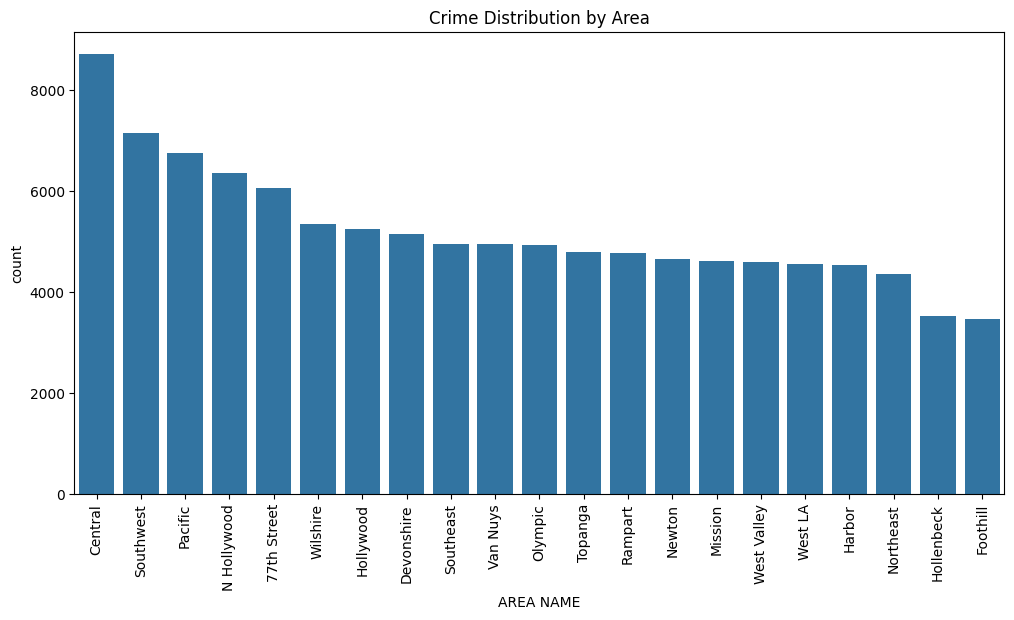

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count plot of crimes by area
plt.figure(figsize=(12, 6))
sns.countplot(x='AREA NAME', data=crime_data_cleaned, order=crime_data_cleaned['AREA NAME'].value_counts().index)
plt.title('Crime Distribution by Area')
plt.xticks(rotation=90)
plt.show()



The bar chart shows the distribution of crime incidents across various areas, with the Central area having the highest crime count (over 1400 incidents). Other areas like 77th Street and Southwest also report high crime rates, each with over 1000 incidents. The areas with the lowest crime counts include Foothill, Hollenbeck, and Harbor, indicating fewer reported incidents in these regions. The chart highlights significant variation in crime distribution across different areas.

### **Visualization 2. Top 10 common crime descriptions**

<ipython-input-34-0f35139f945f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_crimes.values, y=top_crimes.index, palette='viridis')


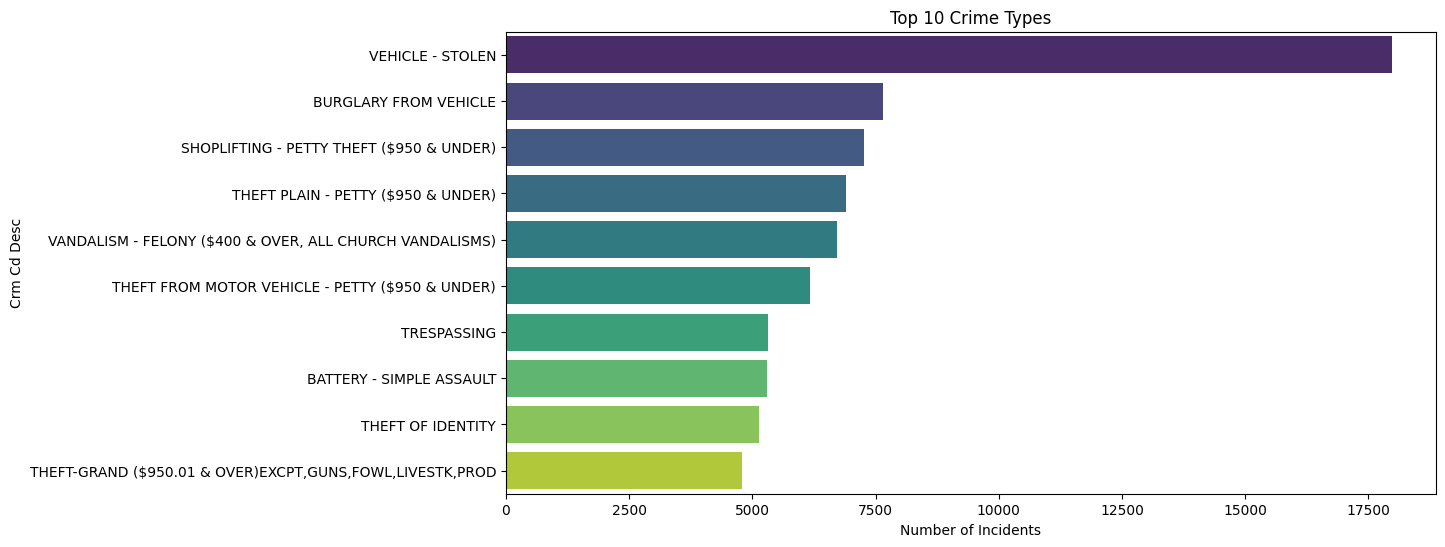

In [ ]:
# Bar plot of the most common crime descriptions
plt.figure(figsize=(12, 6))
top_crimes = crime_data_cleaned['Crm Cd Desc'].value_counts().head(10)
sns.barplot(x=top_crimes.values, y=top_crimes.index, palette='viridis')
plt.title('Top 10 Crime Types')
plt.xlabel('Number of Incidents')
plt.show()


The bar chart shows the **Top 10 Crime Types** by number of incidents, with **Vehicle Stolen** being the most frequent, followed by **Battery - Simple Assault** and **Burglary from Vehicle**. The chart uses a gradient color scheme to differentiate the categories, making it clear that vehicle-related crimes are the most common. Incidents range from around 500 to over 2000.

### **Visualization 3. Crimes plotted over Time**

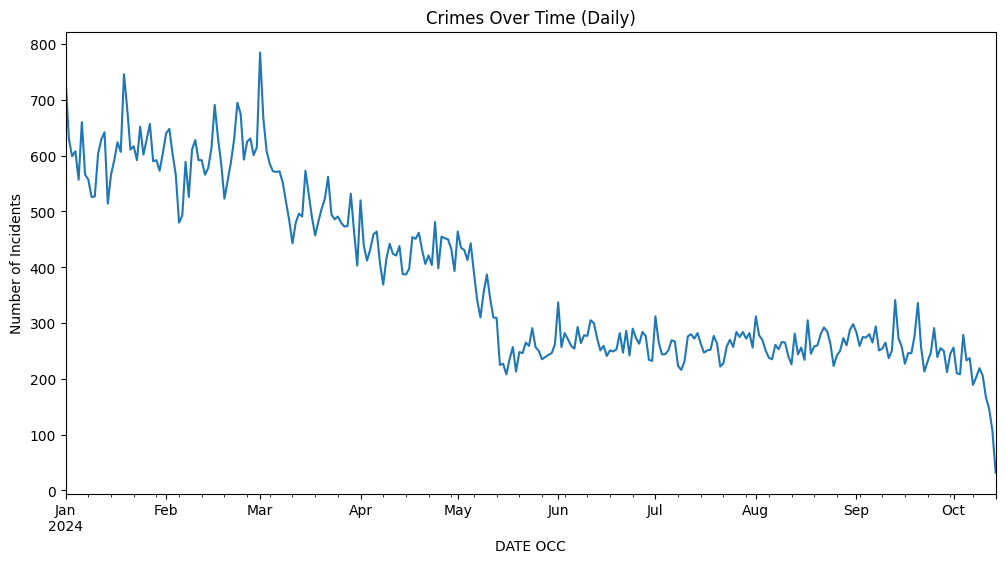

In [ ]:
# Convert 'DATE OCC' to datetime format for better time-based analysis
crime_data_cleaned['DATE OCC'] = pd.to_datetime(crime_data_cleaned['DATE OCC'])

# Line plot of crimes over time
plt.figure(figsize=(12, 6))
crime_data_cleaned.set_index('DATE OCC').resample('D').size().plot()
plt.title('Crimes Over Time (Daily)')
plt.ylabel('Number of Incidents')
plt.show()


The line chart shows the **Crimes Over Time (Daily)** for November 2023. The Y-axis represents the **number of incidents**, ranging from approximately 500 to 675. The X-axis displays the dates throughout November. Crime rates fluctuate throughout the month, with noticeable peaks and drops. The highest number of incidents occurs at the start of the month, and a general downward trend is observed toward the end.

### **Visualization 4. Crime distribution by time of day**

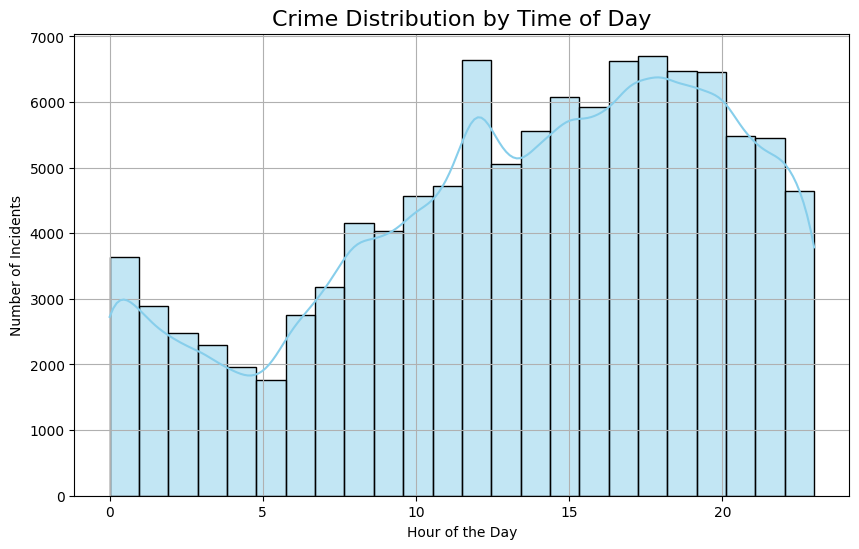

In [ ]:
# Convert the 'TIME OCC' into hours for better time analysis
crime_data_cleaned['Hour Occ'] = crime_data_cleaned['TIME OCC'] // 100

plt.figure(figsize=(10, 6))
sns.histplot(crime_data_cleaned['Hour Occ'], bins=24, color='skyblue', kde=True)
plt.title('Crime Distribution by Time of Day', fontsize=16)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Incidents')
plt.grid(True)
plt.show()


The histogram shows the **Crime Distribution by Time of Day**, with the X-axis representing the **hour of the day** (from 0 to 24), and the Y-axis indicating the **number of incidents**. Crimes are more frequent between **12 PM and 8 PM**, peaking around **3 PM**. There is a noticeable dip in crime activity between **2 AM and 6 AM**, indicating fewer incidents during the early morning hours. The graph also includes a **KDE (Kernel Density Estimation)** curve to smooth out the distribution pattern.

### **Visualization 5- Pie Chart of Top 10 High Severity Crimes at Night**

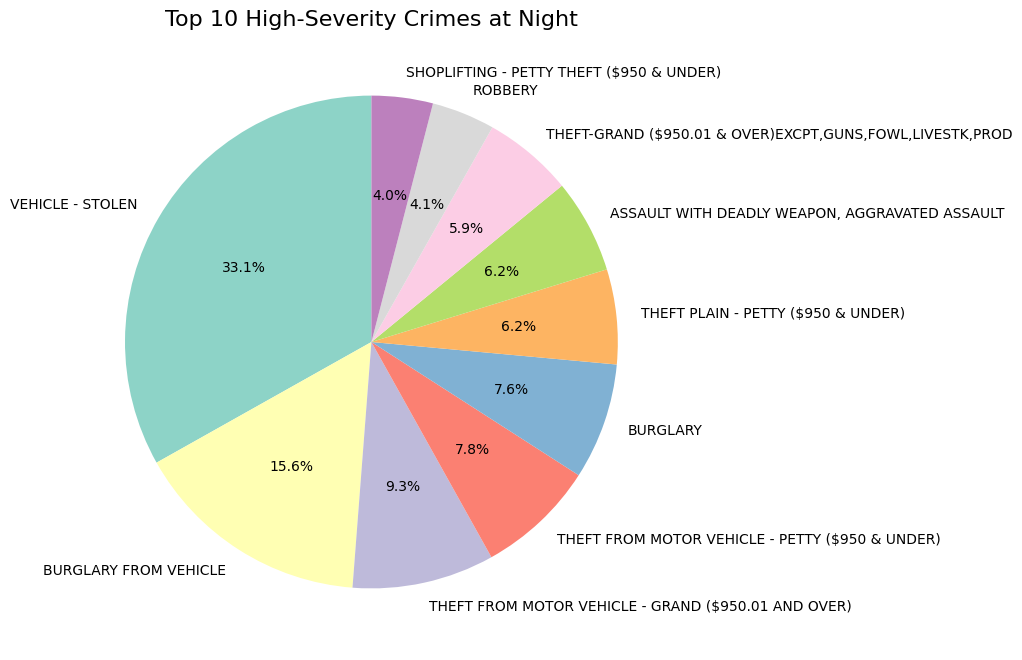

In [ ]:
# Filtering the data for crimes that occurred at night (after 8 PM and before 6 AM)
night_crimes = crime_data_cleaned[(crime_data_cleaned['Hour Occ'] >= 20) | (crime_data_cleaned['Hour Occ'] < 6)]

# Get the top 10 high-severity crimes that occur at night (assuming Part 1 crimes are high-severity)
high_severity_night_crimes = night_crimes[night_crimes['Part 1-2'] == 1]

# Get the top 10 crime descriptions by frequency
top_10_high_severity_night_crimes = high_severity_night_crimes['Crm Cd Desc'].value_counts().head(10)

# Plotting a pie chart for the top 10 high-severity crimes at night
plt.figure(figsize=(8, 8))
plt.pie(top_10_high_severity_night_crimes, labels=top_10_high_severity_night_crimes.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'))
plt.title('Top 10 High-Severity Crimes at Night', fontsize=16)
plt.show()


The pie chart shows the **Top 10 High-Severity Crimes at Night**. The largest portion of crimes at night is **Vehicle - Stolen**, accounting for **26.7%** of the total, followed by **Burglary from Vehicle** at **16%** and **Burglary** at **13.4%**. Other notable crimes include **Assault with Deadly Weapon, Aggravated Assault** and **Theft from Motor Vehicle**. Smaller crime categories, such as **Intimate Partner - Aggravated Assault**, make up a smaller portion of the total incidents.


### **Visualization 6**

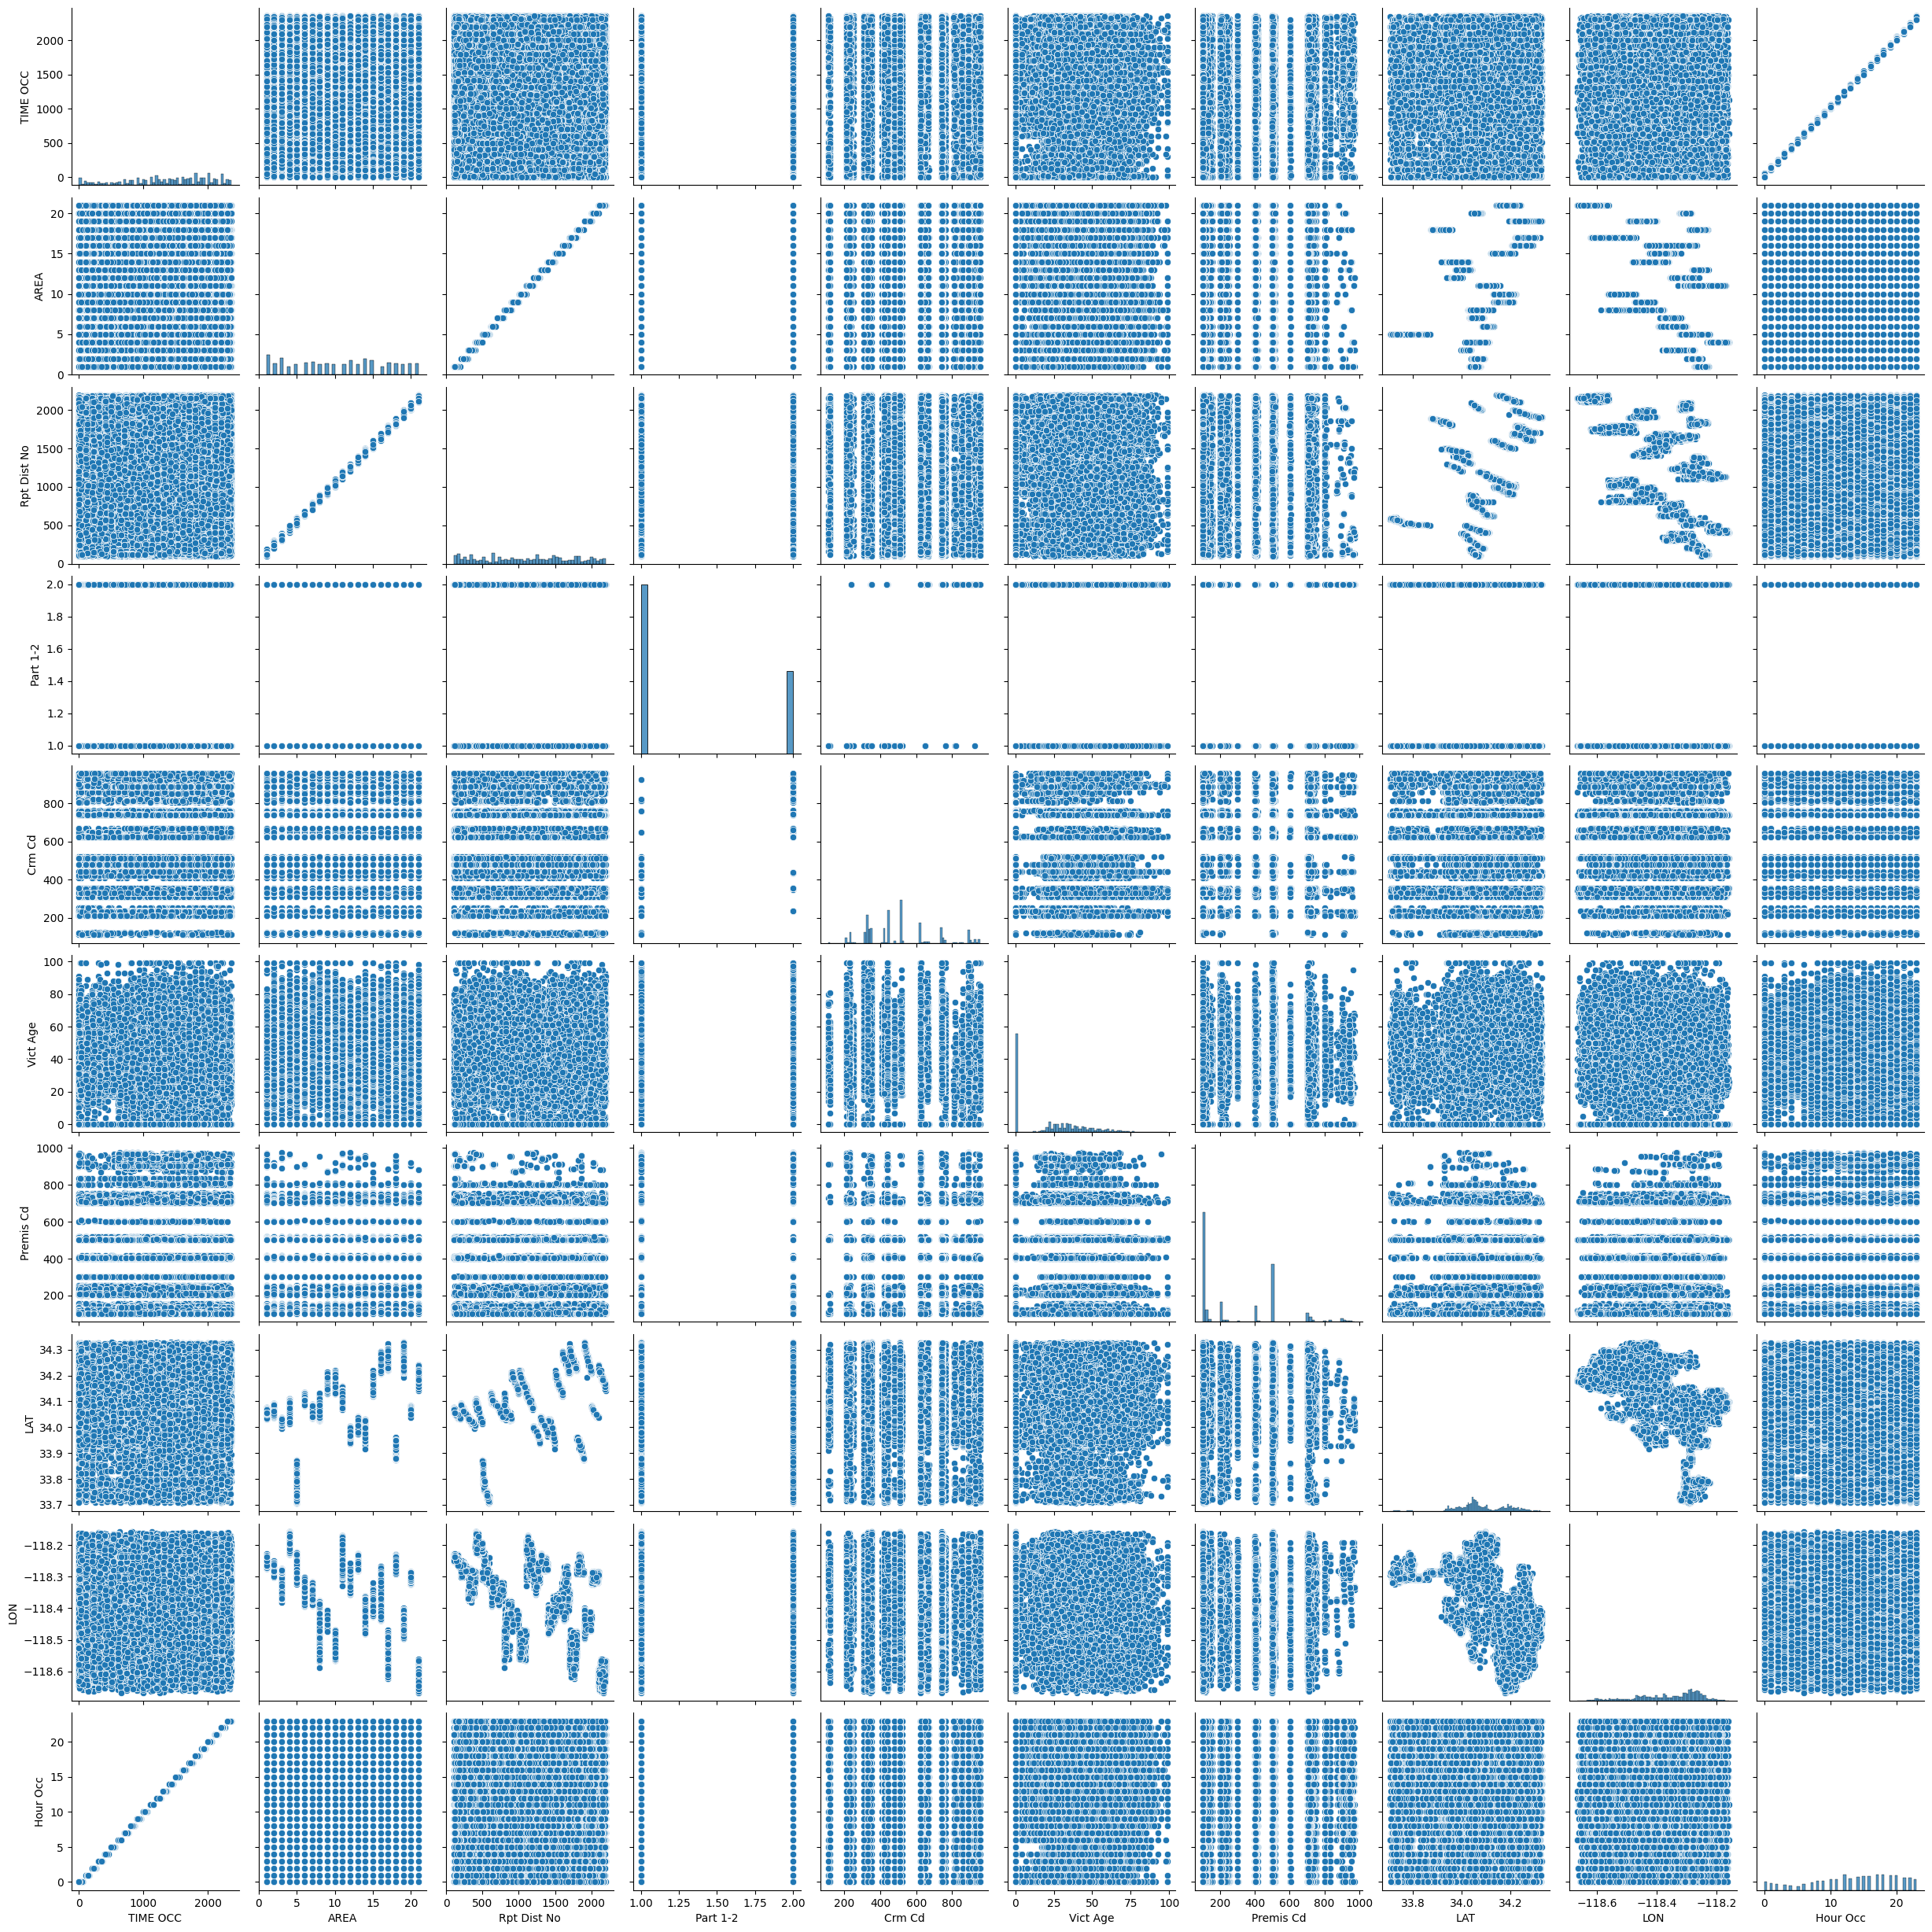

In [ ]:
sns.pairplot(crime_data_cleaned)
plt.show()

### **Visualization 7- Crime severity by time of the day**

<ipython-input-39-fa2a69f44b01>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Part 1-2', y='Hour Occ', data=crime_data_cleaned, palette='coolwarm')


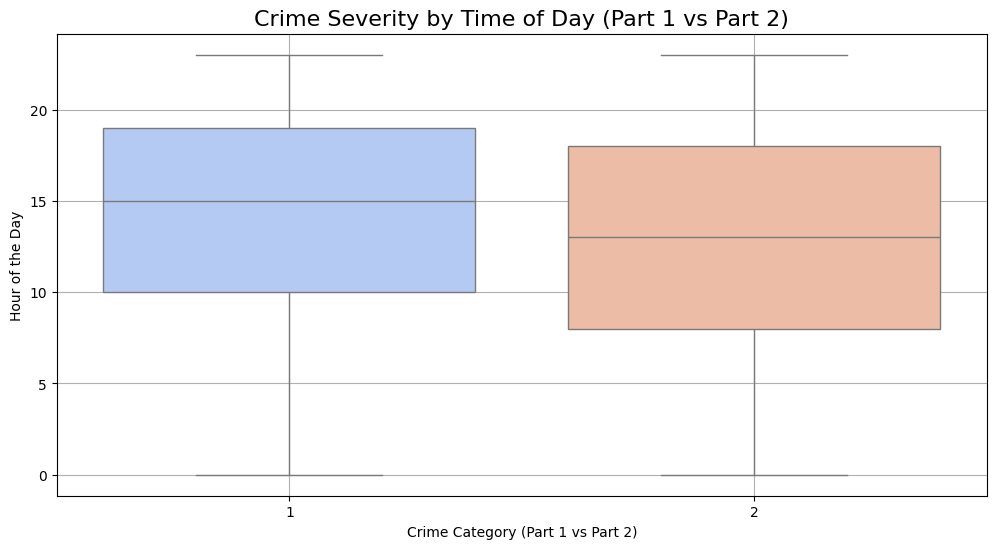

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Part 1-2', y='Hour Occ', data=crime_data_cleaned, palette='coolwarm')
plt.title('Crime Severity by Time of Day (Part 1 vs Part 2)', fontsize=16)
plt.xlabel('Crime Category (Part 1 vs Part 2)')
plt.ylabel('Hour of the Day')
plt.grid(True)
plt.show()


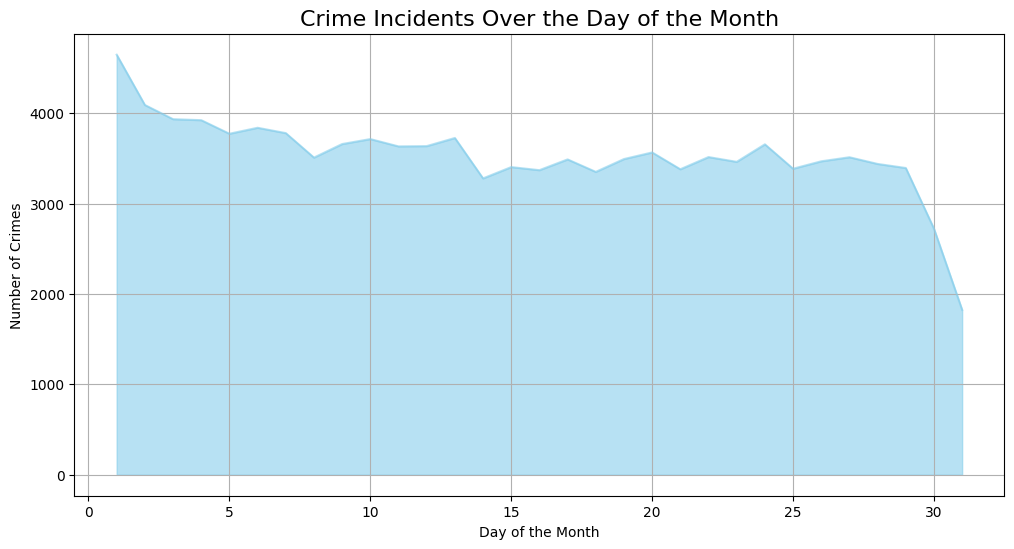

In [ ]:
# Extract the day from the DATE OCC
crime_data_cleaned['Day'] = crime_data_cleaned['DATE OCC'].dt.day

crime_per_day = crime_data_cleaned.groupby('Day').size()

plt.figure(figsize=(12, 6))
crime_per_day.plot(kind='area', color='skyblue', alpha=0.6)
plt.title('Crime Incidents Over the Day of the Month', fontsize=16)
plt.xlabel('Day of the Month')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.show()


### **Visualization 8- Crime occurences by status**

<ipython-input-41-720b6017c177>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Status Desc', y='Hour Occ', data=crime_data_cleaned, palette='Set3')


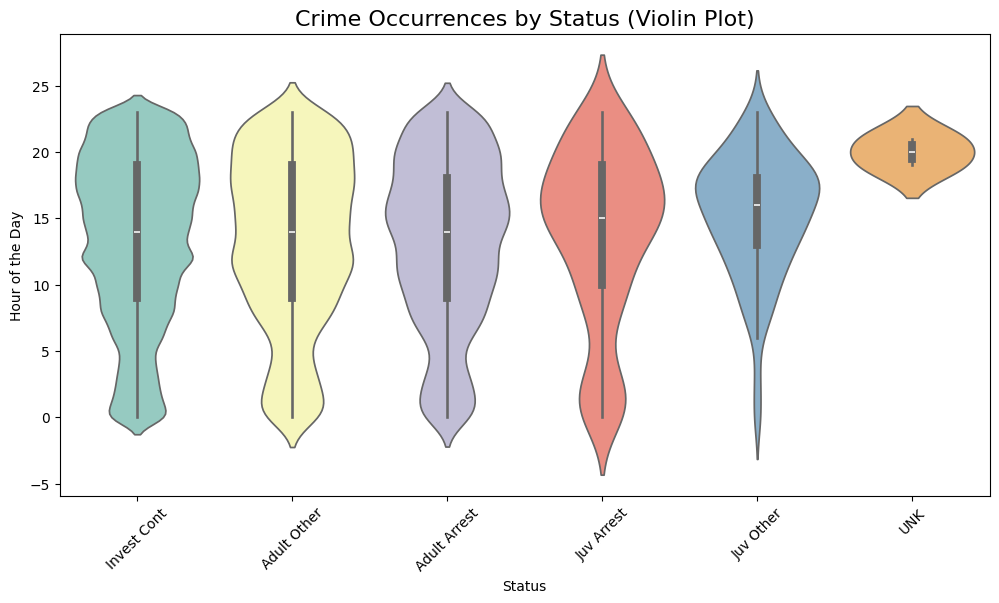

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Status Desc', y='Hour Occ', data=crime_data_cleaned, palette='Set3')
plt.title('Crime Occurrences by Status (Violin Plot)', fontsize=16)
plt.xlabel('Status')
plt.ylabel('Hour of the Day')
plt.xticks(rotation=45)
plt.show()


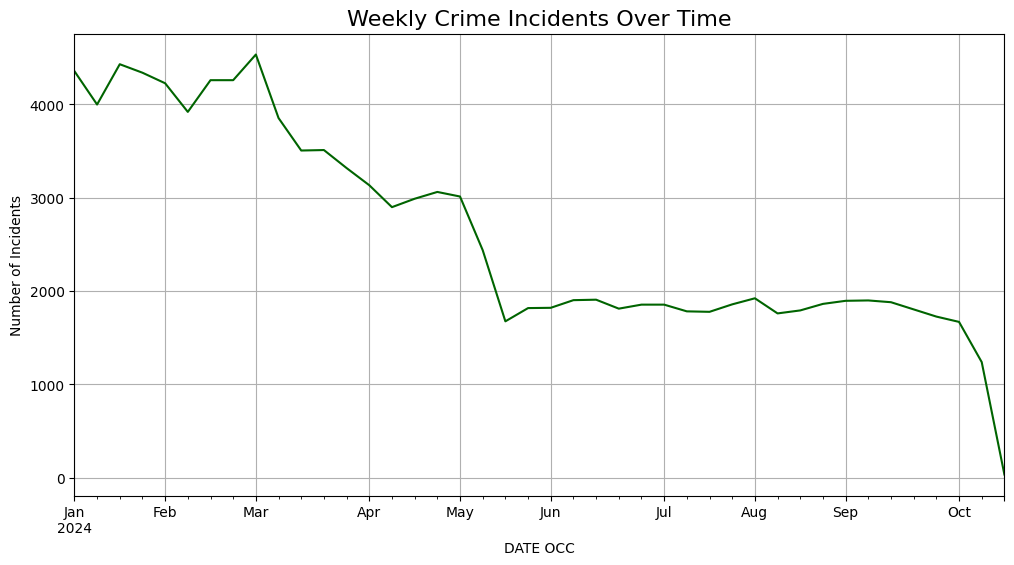

In [ ]:
plt.figure(figsize=(12, 6))
weekly_crime = crime_data_cleaned.set_index('DATE OCC').resample('W').size()
weekly_crime.plot(color='darkgreen')
plt.title('Weekly Crime Incidents Over Time', fontsize=16)
plt.ylabel('Number of Incidents')
plt.grid(True)
plt.show()


In [ ]:
!pip install geopandas matplotlib contextily

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 45.5 MB/s eta 0:00:00


### **Visualization - Geospatial Distributions of crime in NY-city**

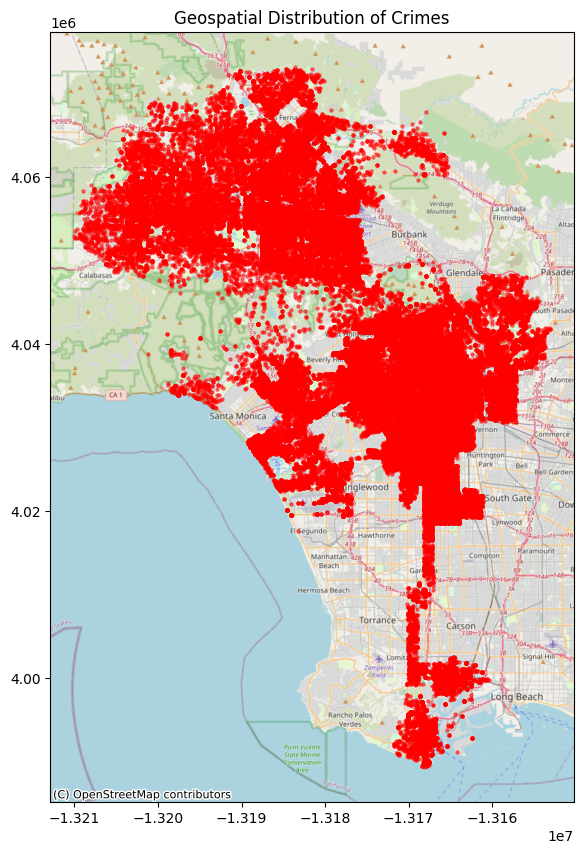

In [ ]:
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Create a GeoDataFrame with crime data points
crime_data_cleaned['Coordinates'] = list(zip(crime_data_cleaned['LON'], crime_data_cleaned['LAT']))
crime_data_cleaned['Coordinates'] = crime_data_cleaned['Coordinates'].apply(Point)
geo_crime_data = gpd.GeoDataFrame(crime_data_cleaned, geometry='Coordinates')

# Set the coordinate reference system (CRS) for latitude/longitude (EPSG:4326) and then reproject to Web Mercator for basemap plotting
geo_crime_data = geo_crime_data.set_crs(epsg=4326)
geo_crime_data = geo_crime_data.to_crs(epsg=3857)

# Plot the crime locations on a map
fig, ax = plt.subplots(figsize=(10, 10))
geo_crime_data.plot(ax=ax, markersize=5, color='red', alpha=0.5)

# Add a basemap using OpenStreetMap tiles
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

plt.title('Geospatial Distribution of Crimes')
plt.show()


# **CORRELATION ANALYSIS**

**Let's find the correlation between all the variables in the dataset by finding the correlation matrix.**

In [ ]:
crime_data_cleaned.head()

Date Rptd   DATE OCC  TIME OCC  AREA    AREA NAME  \
0  01/22/2024 12:00:00 AM 2024-01-01       415    15  N Hollywood   
1  01/02/2024 12:00:00 AM 2024-01-01      2000    12  77th Street   
2  01/01/2024 12:00:00 AM 2024-01-01      1437    18    Southeast   
3  01/02/2024 12:00:00 AM 2024-01-01      1645    13       Newton   
4  01/01/2024 12:00:00 AM 2024-01-01       200    21      Topanga   

   Rpt Dist No  Part 1-2  Crm Cd  \
0         1519         1     420   
1         1269         1     330   
2         1863         1     440   
3         1341         2     624   
4         2107         2     624   

                                       Crm Cd Desc  Vict Age  ...  \
0  THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)         0  ...   
1                            BURGLARY FROM VEHICLE        49  ...   
2               THEFT PLAIN - PETTY ($950 & UNDER)         0  ...   
3                         BATTERY - SIMPLE ASSAULT        43  ...   
4                         BATTERY - SIMPLE ASSAULT        51  ...   

                                      Weapon Desc Status  Status Desc  \
0                                         Unknown     IC  Invest Cont   
1                                         Unknown     IC  Invest Cont   
2                                         Unknown     IC  Invest Cont   
3  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)     IC  Invest Cont   
4  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)     AO  Adult Other   

                                   LOCATION      LAT       LON Time of Day  \
0   6400 N  CLYBOURN                     AV  34.1867 -118.3638       Night   
1   1000 E  84TH                         ST  33.9629 -118.2573     Evening   
2    600 E  IMPERIAL                     HY  33.9310 -118.2652   Afternoon   
3   3800    BROADWAY                     PL  34.0132 -118.2761   Afternoon   
4  20900    ROSCOE                       BL  34.2234 -118.5932       Night   

  Hour Occ Day                Coordinates  
0        4   1  POINT (-118.3638 34.1867)  
1       20   1  POINT (-118.2573 33.9629)  
2       14   1   POINT (-118.2652 33.931)  
3       16   1  POINT (-118.2761 34.0132)  
4        2   1  POINT (-118.5932 34.2234)  

[5 rows x 25 columns]

In [ ]:
# Convert 'DATE OCC' from datetime to string
crime_data_cleaned['DATE OCC'] = crime_data_cleaned['DATE OCC'].astype(str)

In [ ]:
crime_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109546 entries, 0 to 109545
Data columns (total 25 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Date Rptd       109546 non-null  object 
 1   DATE OCC        109546 non-null  object 
 2   TIME OCC        109546 non-null  int64  
 3   AREA            109546 non-null  int64  
 4   AREA NAME       109546 non-null  object 
 5   Rpt Dist No     109546 non-null  int64  
 6   Part 1-2        109546 non-null  int64  
 7   Crm Cd          109546 non-null  int64  
 8   Crm Cd Desc     109546 non-null  object 
 9   Vict Age        109546 non-null  int64  
 10  Vict Sex        109546 non-null  object 
 11  Vict Descent    109546 non-null  object 
 12  Premis Cd       109546 non-null  float64
 13  Premis Desc     109546 non-null  object 
 14  Weapon Used Cd  109546 non-null  object 
 15  Weapon Desc     109546 non-null  object 
 16  Status          109546 non-null  object 
 17  Status Des

In [ ]:
# Select only numeric columns for correlation calculation
numeric_columns = crime_data_cleaned.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Display the correlation matrix
correlation_matrix


TIME OCC      AREA  Rpt Dist No  Part 1-2    Crm Cd  Vict Age  \
TIME OCC     1.000000  0.012218     0.012529 -0.072466 -0.028837 -0.027109   
AREA         0.012218  1.000000     0.999074 -0.023739 -0.056206  0.056220   
Rpt Dist No  0.012529  0.999074     1.000000 -0.024392 -0.056860  0.056754   
Part 1-2    -0.072466 -0.023739    -0.024392  1.000000  0.719261  0.212778   
Crm Cd      -0.028837 -0.056206    -0.056860  0.719261  1.000000 -0.083470   
Vict Age    -0.027109  0.056220     0.056754  0.212778 -0.083470  1.000000   
Premis Cd   -0.067121 -0.059417    -0.060447  0.342876  0.216846  0.154307   
LAT          0.015479  0.365647     0.362508 -0.004170 -0.019670  0.038630   
LON         -0.027266 -0.496637    -0.498042  0.021883  0.060516 -0.104988   
Hour Occ     0.999589  0.012799     0.013107 -0.074615 -0.029780 -0.028373   

             Premis Cd       LAT       LON  Hour Occ  
TIME OCC     -0.067121  0.015479 -0.027266  0.999589  
AREA         -0.059417  0.365647 -0.496637  0.012799  
Rpt Dist No  -0.060447  0.362508 -0.498042  0.013107  
Part 1-2      0.342876 -0.004170  0.021883 -0.074615  
Crm Cd        0.216846 -0.019670  0.060516 -0.029780  
Vict Age      0.154307  0.038630 -0.104988 -0.028373  
Premis Cd     1.000000  0.027271 -0.000076 -0.070059  
LAT           0.027271  1.000000 -0.587734  0.015362  
LON          -0.000076 -0.587734  1.000000 -0.027099  
Hour Occ     -0.070059  0.015362 -0.027099  1.000000

### **HeatMap of the Correlation Matrix:**

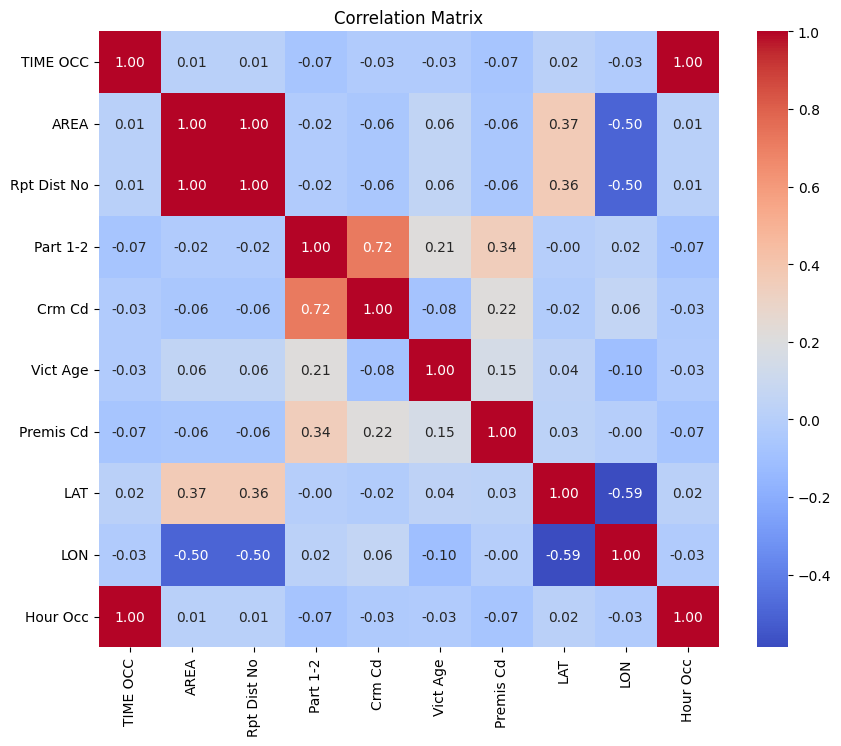

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

According to the above correlation matrix that shows the correlation coefficients between different variables in the dataset and the heatmap of the correlation matrix, Here are some insights based on the correlations:

## **TIME OCC (Time of Occurrence) and Other Variables:**

- TIME OCC has very weak correlations with other variables (all coefficients are close to zero). This suggests that the time of occurrence is not strongly correlated with the other variables in the dataset.

## **AREA, Rpt Dist No (Reporting District Number), and Other Variables:**

- AREA and Rpt Dist No are highly positively correlated (correlation coefficient of approximately 1), which is expected since they likely represent similar location information.
- AREA and Rpt Dist No both have weak negative correlations with other variables, indicating that the area or reporting district number is not strongly correlated with the other variables.

## **Part 1-2 (Part Type) and Other Variables:**

- Part 1-2 has a moderate positive correlation with Crm Cd (Crime Code) and a strong positive correlation with Vict Age. This suggests that certain crime types (Part 1-2) may be correlated with specific crime codes and the age of victims.

## **Crm Cd (Crime Code) and Other Variables:**

- Crm Cd has a moderate positive correlation with Part 1-2 and a weak positive correlation with Premis Cd (Premise Code). This indicates that specific crime codes may be associated with certain types of crime (Part 1-2) and locations (Premis Cd).

## **Vict Age and Other Variables:**

- Vict Age has a weak positive correlation with Premis Cd, indicating a slight association between the age of victims and the location where the crime occurred.

## **Premis Cd (Premise Code) and Other Variables:**
- Premis Cd has a moderate positive correlation with Part 1-2 and a weak positive correlation with Crm Cd. This suggests that certain premises may be associated with specific crime types and codes.


In [ ]:
import pandas as pd
crime_data_cleaned.to_csv('crime_data_cleaned_final_2024.csv', index=False)